In [1]:
import numpy as np
import pandas as pd
from collections import deque
import pymongo
from pymongo import MongoClient
print( 'Mongo version', pymongo.__version__)

Mongo version 3.7.0


In [2]:
import networkx as nx
import csv

In [3]:
#main db
config = {
  'host': '127.0.0.1',
  'username': 'mongo_user',
  'password': 'password',
  'authSource': 'pin'
}

client = MongoClient(**config)

db = client.pin
collection1=db.users
collection7=db.sampled4

In [23]:
collection7.find().count()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


51

In [24]:
data = pd.DataFrame(list(collection7.find()))

In [25]:
data.head(2)

,_id,follower_count,followers,user_id
0,5b9848b5ab17aa07375c5afd,20,"[248632, 72015, 2076884, 8483080, 8509218, 946...",22285154
1,5b982cccab17aa07371fe263,320,"[2082107, 2088174, 2095790, 2111452, 2127930, ...",248632


In [26]:
data.drop(columns={'_id','follower_count'},inplace=True)

In [27]:
data.head()

,followers,user_id
0,"[248632, 72015, 2076884, 8483080, 8509218, 946...",22285154
1,"[2082107, 2088174, 2095790, 2111452, 2127930, ...",248632
2,"[2132960, 2209803, 2550587, 2596606, 3007291, ...",72015
3,"[6744963, 1098116, 26123655, 14716810, 1518618...",2076884
4,"[19902465, 20700430, 126483, 384410, 2416028, ...",8483080


In [28]:
count=51
datalist=[]
for index,row in data.iterrows():
    nodes = [row['user_id']]
    followers=row['followers']
    if len(followers)!=0:
        last=followers.pop()
        followers.append(last.strip('\n'))
    nodes.extend(followers)
    datalist.append(nodes)
    count-=1
    if count == 0:
        break


In [29]:
len(datalist)

51

In [30]:
data.to_csv('sample5.txt',encoding='utf-8', index=False) #

In [31]:

with open('newfun6.txt','w') as f:
    writer=csv.writer(f,delimiter=' ')
    writer.writerows(datalist[:])

G=nx.read_adjlist('newfun6.txt')
len(list(nx.connected_components(G))), len(G.edges()) / len(G.nodes())

(1, 1.043664996420902)

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
len(G.nodes())

2794

In [33]:
len(G.edges())

2916

In [34]:
#for gephy
with open('adj_list_sample4_new.csv','w') as f:
    writer=csv.writer(f,delimiter=';')
    writer.writerows(datalist[:])

<IPython.core.display.Javascript object>


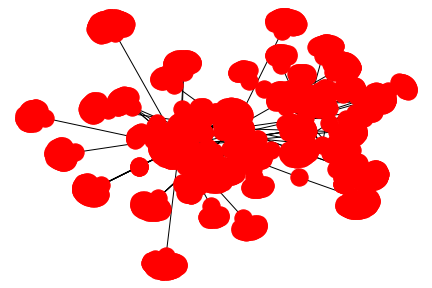

In [39]:
%matplotlib notebook
nx.draw(G)